In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [2]:
# Load the data
df = pd.read_csv('../data/train_cleaned.csv')
df.head()


,id,ac,target,s_std_day_year,c_std_day_year,std_day,sta_day,std_month,sta_month,s_std_time_dec,c_std_time_dec,iso_country_dep,type_dep,iso_country_arr,type_arr,is_same_country
0,train_id_0,TU 32AIMN,260.0,0.051620,0.998667,Sunday,Sunday,January,January,0.382683,-0.923880,MA,large_airport,TN,large_airport,False
1,train_id_1,TU 31BIMO,20.0,0.221922,0.975065,Wednesday,Wednesday,January,January,-0.725374,-0.688355,IT,large_airport,TN,large_airport,False
2,train_id_2,TU 32AIMN,0.0,0.271958,0.962309,Saturday,Saturday,January,January,0.891007,0.453990,TN,large_airport,TR,large_airport,False
3,train_id_3,TU 736IOK,0.0,0.288482,0.957485,Sunday,Sunday,January,January,-0.544639,-0.838671,TN,medium_airport,FR,medium_airport,False
4,train_id_4,TU 320IMU,22.0,0.288482,0.957485,Sunday,Sunday,January,January,-0.608761,-0.793353,TN,large_airport,DZ,large_airport,False


In [3]:
df.describe()

,target,s_std_day_year,c_std_day_year,s_std_time_dec,c_std_time_dec
count,93679.000000,93679.000000,93679.000000,93679.000000,93679.000000
mean,55.655099,-0.054066,-0.090931,-0.022091,-0.400558
std,123.262956,0.695388,0.710813,0.722511,0.563074
min,0.000000,-0.999991,-0.999963,-1.000000,-1.000000
25%,0.000000,-0.729558,-0.798779,-0.743145,-0.891007
50%,19.000000,-0.128748,-0.183998,-0.026177,-0.522499
75%,50.000000,0.628763,0.598181,0.725374,-0.078459
max,3451.000000,0.999991,1.000000,1.000000,1.000000


In [4]:
# Define bins and labels
bins = [-float('inf'), 0, 30, 90, 180, float('inf')]
labels = ['0', '1', '2', '3', '4']

# Create a new column for categorized delays
df['delay_category'] = pd.cut(df['target'], bins=bins, labels=labels, right=True)

# change delay category to object type
df['delay_category'] = df['delay_category'].astype('object')

# Check the distribution of categories
print(df['delay_category'].value_counts())

delay_category
1    34622
0    24468
2    18478
3     9120
4     6991
Name: count, dtype: int64


In [5]:
# Split the data into features and target label
X = df.drop(['target', 'id', 'delay_category'], axis=1)
y = df['delay_category']

In [6]:
# #one-hot encode features
# X = pd.get_dummies(X)

In [7]:
# Split the data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74943 entries, 65956 to 15795
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ac               74943 non-null  object 
 1   s_std_day_year   74943 non-null  float64
 2   c_std_day_year   74943 non-null  float64
 3   std_day          74943 non-null  object 
 4   sta_day          74943 non-null  object 
 5   std_month        74943 non-null  object 
 6   sta_month        74943 non-null  object 
 7   s_std_time_dec   74943 non-null  float64
 8   c_std_time_dec   74943 non-null  float64
 9   iso_country_dep  74943 non-null  object 
 10  type_dep         74943 non-null  object 
 11  iso_country_arr  74943 non-null  object 
 12  type_arr         74943 non-null  object 
 13  is_same_country  74943 non-null  bool   
dtypes: bool(1), float64(4), object(9)
memory usage: 8.1+ MB


In [9]:
# scaler = StandardScaler()

# # Fit and transform the specified columns
# X_train[['sta_time_dec', 'std_time_dec']] = scaler.fit_transform(X_train[['sta_time_dec', 'std_time_dec']])
# X_test[['sta_time_dec', 'std_time_dec']] = scaler.transform(X_test[['sta_time_dec', 'std_time_dec']])

In [10]:
#make dummie variables

# Define categorical, boolean, and numerical features
categorical_features = [
    'ac', 'std_day', 'sta_day', 'std_month', 'sta_month', 'iso_country_dep', 'iso_country_arr', 'type_dep', 'type_arr'
]
boolean_features = ['is_same_country']
numerical_features = ['s_std_time_dec', 'c_std_time_dec', 's_std_day_year', 'c_std_day_year']  # Add other numerical features here

# Initialize transformers
one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', one_hot, categorical_features),
        ('passthrough', 'passthrough', boolean_features + numerical_features)  
    ])

# Fit and transform data
preprocessor.fit(X_train_resampled)
X_train_encoded = preprocessor.transform(X_train_resampled)
X_test_encoded = preprocessor.transform(X_test_resampled)

# Get the feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Convert X_train_encoded and X_test_encoded to DataFrames
X_train_resampled = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_resampled = pd.DataFrame(X_test_encoded, columns=feature_names)

In [11]:
X_train_resampled.head()

,one_hot__ac_5K 343TQY,one_hot__ac_5K 345TFX,one_hot__ac_5M 343FOX,one_hot__ac_5M 343JAI,one_hot__ac_5M 343SUN,one_hot__ac_6P M87TRJ,one_hot__ac_BJ 320INA,one_hot__ac_BJ 320INB,one_hot__ac_BJ 320INC,one_hot__ac_BJ 320INH,...,one_hot__type_dep_medium_airport,one_hot__type_dep_small_airport,one_hot__type_arr_large_airport,one_hot__type_arr_medium_airport,one_hot__type_arr_small_airport,passthrough__is_same_country,passthrough__s_std_time_dec,passthrough__c_std_time_dec,passthrough__s_std_day_year,passthrough__c_std_day_year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,False,0.156434,-0.987688,0.746972,0.664855
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,False,-0.99863,0.052336,0.835925,-0.548843
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,False,-0.45399,-0.891007,0.47116,-0.882048
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,False,0.649448,-0.760406,0.46355,0.886071
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,False,0.5,-0.866025,-0.845249,-0.534373


Original training set class distribution:
delay_category
1    27718
0    27718
3    27718
4    27718
2    27718
Name: count, dtype: int64

Resampled training set class distribution:
delay_category
1    27718
0    27718
3    27718
4    27718
2    27718
Name: count, dtype: int64


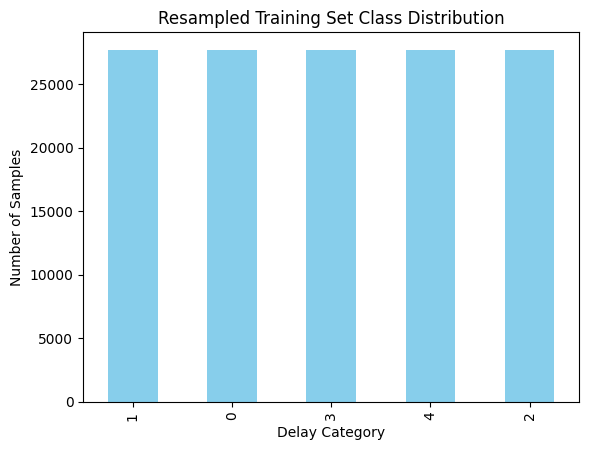

In [12]:
#use random over sampler to balance the classes
from imblearn.over_sampling import RandomOverSampler

# Convert y_train to integer type
y_train_resampled = y_train_resampled.astype(int)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the training set
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_resampled, y_train_resampled)

# Check the distribution of the resampled target variable
print("Original training set class distribution:")
print(y_train_resampled.value_counts())
print("\nResampled training set class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Visualize the resampled class distribution
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color='skyblue')
plt.title('Resampled Training Set Class Distribution')
plt.xlabel('Delay Category')
plt.ylabel('Number of Samples')
plt.show()


In [13]:
# save X_train, X_test, y_train, y_test in csv files
X_train_resampled.to_csv('../data/X_train_resampled.csv', index=False)
X_test_resampled.to_csv('../data/X_test_resampled.csv', index=False)
y_train_resampled.to_csv('../data/y_train_resampled.csv', index=False)
y_test_resampled.to_csv('../data/y_test_resampled.csv', index=False)

## maybe scaling of features, as distribution is skewed

In [14]:
# # Create histograms for every feature in the dataframe
# for column in df.columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[column], kde=True)
#     plt.title(f'Histogram of {column}')
#     plt.show()